In [128]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from math import exp, pi, sqrt




In [129]:
df = pd.read_csv('iris.csv')
report = df.describe()
print(report)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


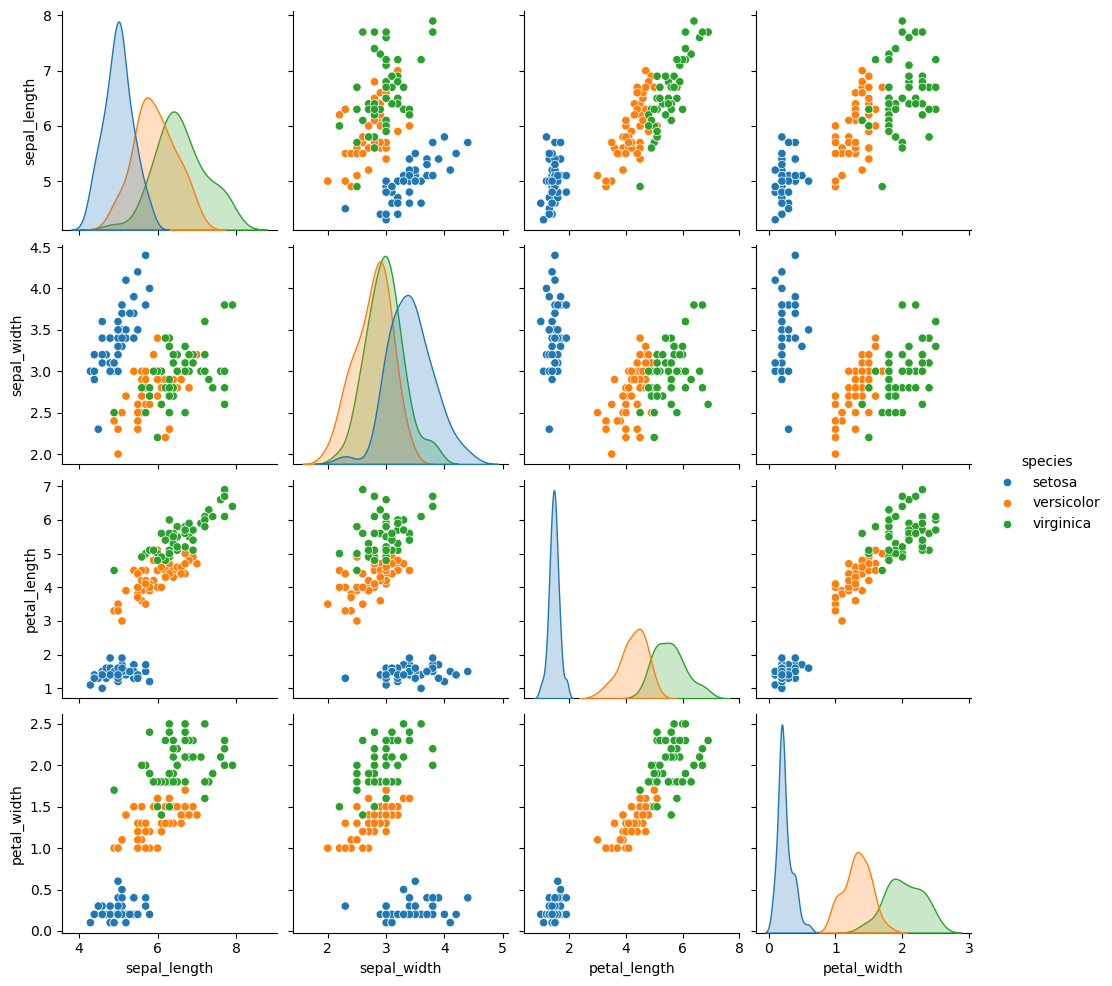

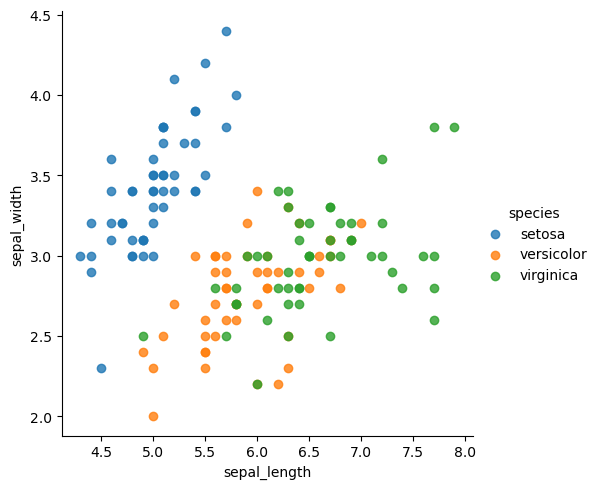

In [130]:
sns.pairplot(df, hue='species')
sns.lmplot(x='sepal_length', y='sepal_width', data=df, hue='species', fit_reg=False)


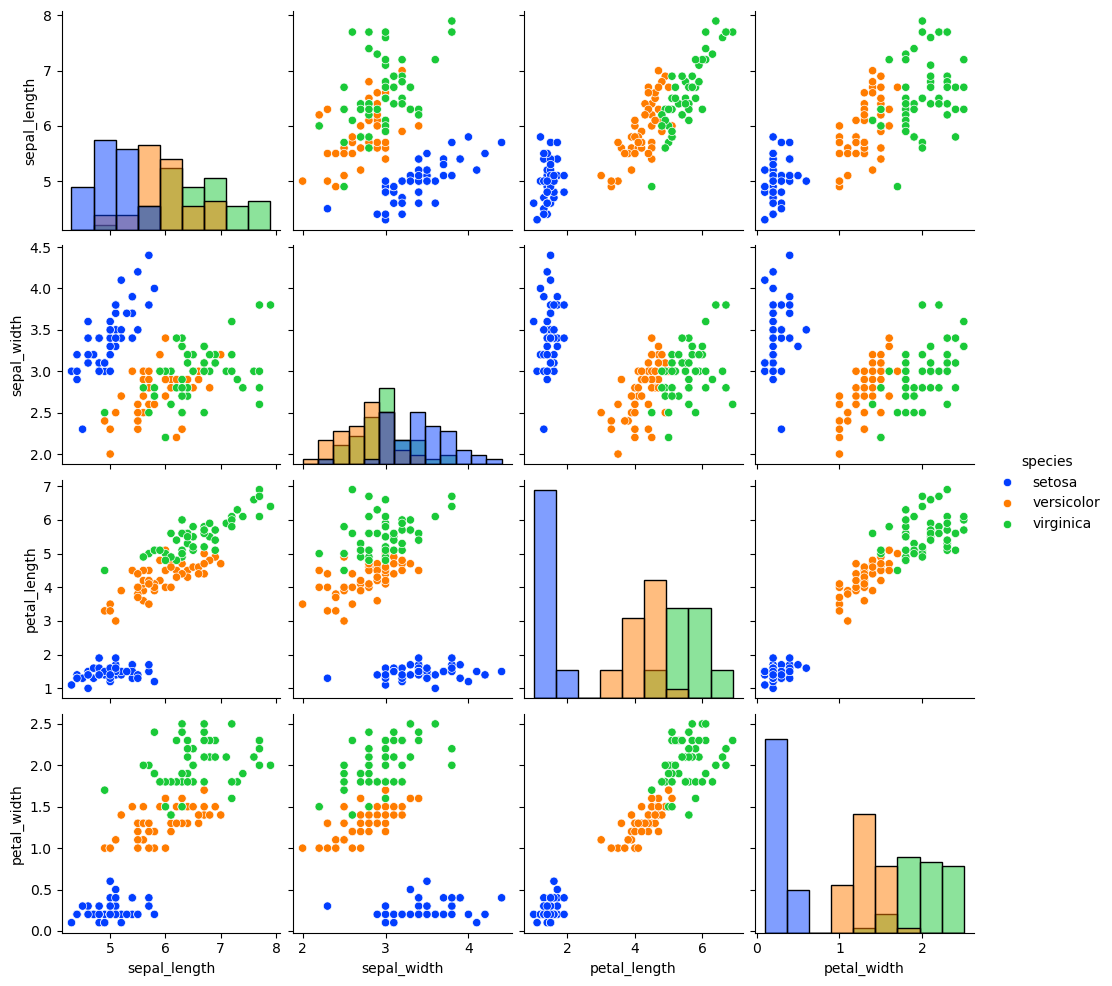

In [131]:
sns.pairplot(df, hue='species', diag_kind='hist', palette='bright')

<Axes: xlabel='species', ylabel='sepal_length'>

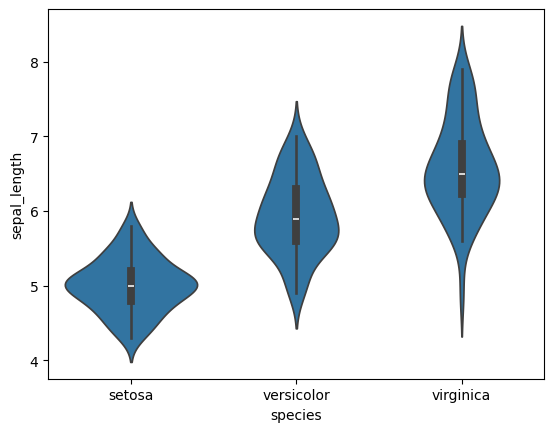

In [132]:
sns.violinplot(x='species', y='sepal_length', data=df)

<Axes: >

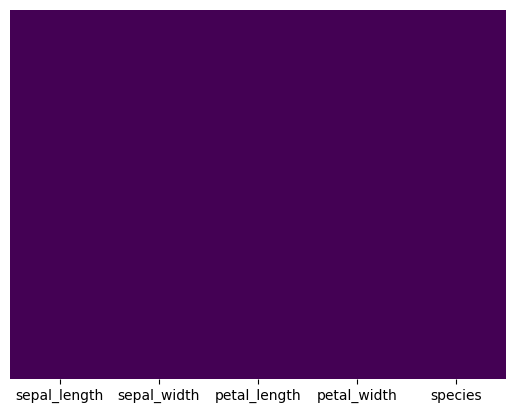

In [133]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

phan chia du lieu 


In [134]:
def class_seperation(dataset):
    class_dict = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        
        if class_value not in class_dict:
            class_dict[class_value] = list()
        class_dict[class_value].append(vector)
    return class_dict
class_dict = class_seperation(df.values)

In [135]:
def train_test_seperation(dataset):
    class_dict_train = dict()
    class_dict_test = dict()
    
    for label in dataset:
        data_train, data_test = train_test_split(dataset[label], test_size=0.2)
        
        class_dict_train[label] = list()
        class_dict_test[label] = list()
        
        class_dict_train[label].append(data_train)
        class_dict_test[label].append(data_test)
        
    return class_dict_train, class_dict_test
class_dict_train, class_dict_test = train_test_seperation(class_dict)

In [136]:
def mean(x):
    return sum(x) / float(len(x))

In [137]:
def stdev(x):
    avg = mean(x)
    variance = sum([(xi - avg) ** 2 for xi in x]) / (len(x) - 1)
    return sqrt(variance)

In [138]:
def feature_statistics(dataset):
    statistic = [(mean(feature), stdev(feature), len(feature)) for feature in dataset]
    return statistic

chia tap du lieu thang tung lop va tinh cac dai luong thong ke co ban

In [139]:
def statistic_by_class(class_dict):
    statistics = dict()
    
    for class_label, rows in class_dict.items():
        data = np.transpose(rows)[:-1] 
        statistics[class_label] = feature_statistics(data)
    return statistics

statistics = statistic_by_class(class_dict_train)

C:\Users\Student\AppData\Local\Temp\ipykernel_5436\4177372035.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sqrt(variance)


tinh xac suat tuong ung moi lop

In [140]:
def probability_calculation(x, mean, stdev):
    exponent = exp(-((x - mean) ** 2 / (2 * stdev ** 2)))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent

xay dung ham phan biet 

In [141]:
def discriminator(train_statistics, x):
    
    total_patterns = sum([train_statistics[label][0][2] for label in train_statistics])

    discriminant = dict()
    for class_label, class_statistics in train_statistics.items():
        
        discriminant[class_label] = train_statistics[class_label][0][2] / float(total_patterns)

        for i in range(len(x)):
            mean, stdev, _ = class_statistics[i]  

            discriminant[class_label] *= probability_calculation(x[i], mean, stdev)

    return discriminant

ham predict

In [142]:
def predict(train_statistics, x):
    discriminant = discriminator(train_statistics, x)
    best_label, best_prob= None, -1
    for class_i, discriminat_i in discriminant.items():
        if best_label is None or discriminat_i > best_prob:
            best_prob = discriminat_i
            best_label = class_i
    return best_label, best_prob


naive bayes

In [143]:
def naive_bayes(train, test):
    train_statistics = statistic_by_class(train)
    predictions = dict()
    for class_label, data in test.items():
        predictions[class_label] = list()
        for x in data[0]:
            output, _ = predict(train_statistics, x[:-1])
            predictions[class_label].append(output)
    return predictions

Danh gia 

In [144]:
from sklearn.metrics import confusion_matrix, accuracy_score
def confusionMatrix(predictions):
    # chuyen label sang list
    actualLabels = list()
    predictedLabels = list()
    labelList = list(predictions.keys())
    for actu_label, predicted in predictions.items():
        for label in predicted:
            actualLabels.append(actu_label)
            predictedLabels.append(label)
    confu_matrix = confusion_matrix(y_true= actualLabels, y_pred=predictedLabels, labels=labelList)
    return confu_matrix, labelList
predictions = naive_bayes(class_dict_train, class_dict_test)
confu_matrix, _ = confusionMatrix(predictions)


print("Confusion Matrix:")
print(confu_matrix)

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


C:\Users\Student\AppData\Local\Temp\ipykernel_5436\4177372035.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return sqrt(variance)
C:\Users\Student\AppData\Local\Temp\ipykernel_5436\1595261447.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  exponent = exp(-((x - mean) ** 2 / (2 * stdev ** 2)))


In [146]:
def accuracy(predictions):
    # chuyen dict sang list
    actualLabels = list()
    predictedLabels = list()
    for actu_label, predicted in predictions.items():
        for label in predicted:
            actualLabels.append(actu_label)
            predictedLabels.append(label)
    accu = accuracy_score(y_true= actualLabels, y_pred=predictedLabels, normalize=True)
    return accu

accu=accuracy(predictions)
print("Accuracy:",accu)

Accuracy: 1.0
